<a href="https://colab.research.google.com/github/h-neal/ukpropertyprices/blob/main/Price_Paid_Dataset_(Hampshire_5_year)_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Importing dataset**

In [ ]:
#Importing the modelling dataset

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Use pd.read_pickle() to read the pickle file
df_model_housing_data = pd.read_pickle('/content/drive/MyDrive/Housing Prices Project/Hampshire 5 Year/model_housing_data_Hampshire_5_year.pkl')

Mounted at /content/drive


**2. Overview of the dataset**

In [ ]:
# Check for missing values

missing_values = df_model_housing_data.isnull().sum()
print(missing_values)


Price                      0
TimeTrend                  0
Property Type_F            0
Property Type_S            0
Property Type_T            0
New Build? (Y/N)_Y         0
Duration_L                 0
Price_Segment_Luxury       0
Price_Segment_Regular      0
District_east hampshire    0
District_eastleigh         0
District_fareham           0
District_gosport           0
District_hart              0
District_havant            0
District_new forest        0
District_rushmoor          0
District_test valley       0
District_winchester        0
dtype: int64


In [ ]:
# Get the data types of each column

data_types = df_model_housing_data.dtypes
print(data_types)


Price                      int64
TimeTrend                  int64
Property Type_F             bool
Property Type_S             bool
Property Type_T             bool
New Build? (Y/N)_Y          bool
Duration_L                  bool
Price_Segment_Luxury        bool
Price_Segment_Regular       bool
District_east hampshire     bool
District_eastleigh          bool
District_fareham            bool
District_gosport            bool
District_hart               bool
District_havant             bool
District_new forest         bool
District_rushmoor           bool
District_test valley        bool
District_winchester         bool
dtype: object


**2. Feature Selection**

2.2. Handling Multicollinearity

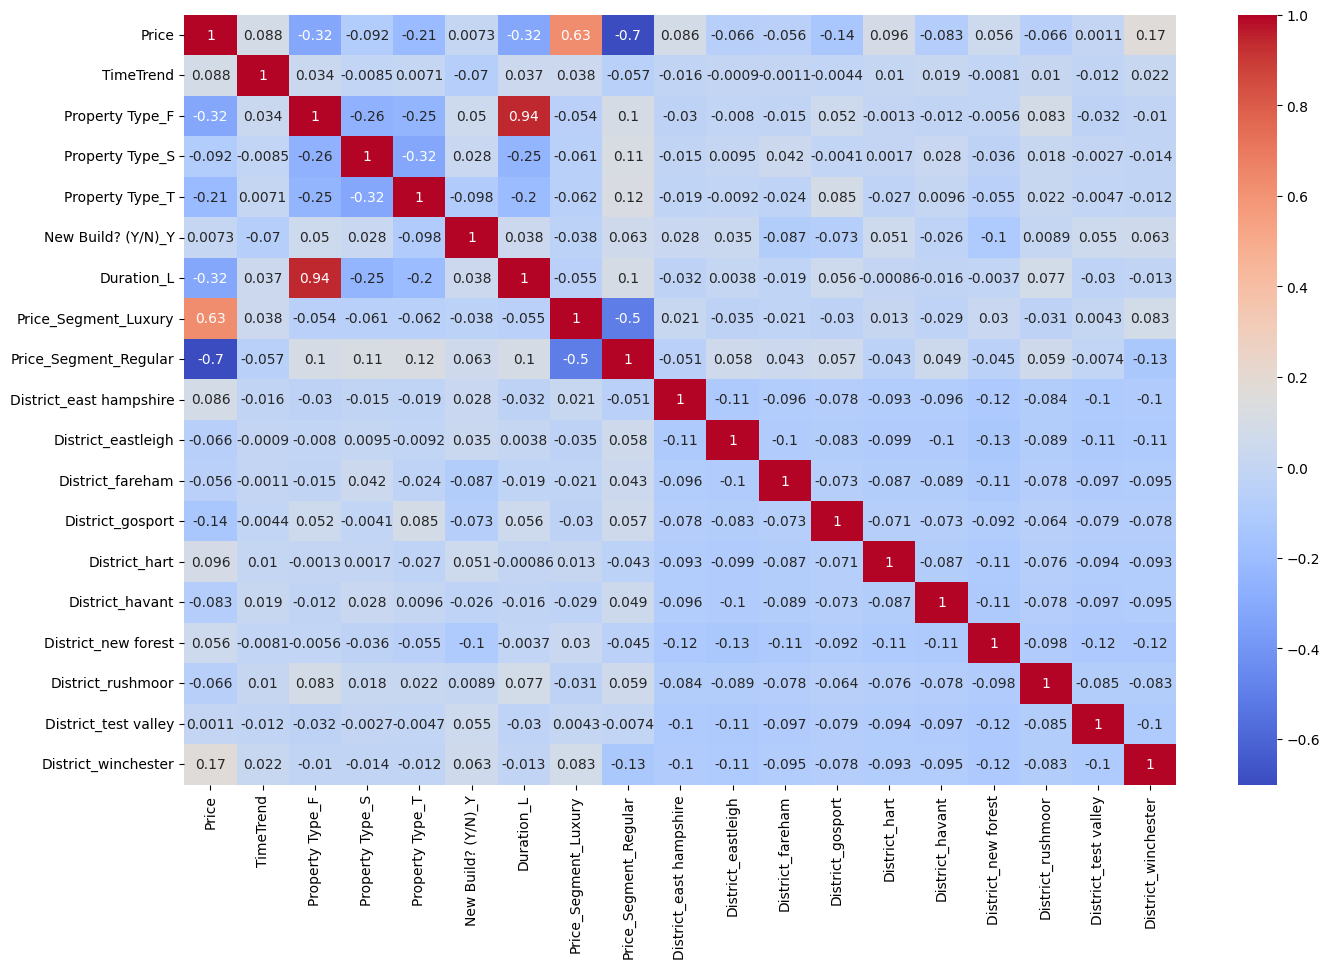

In [ ]:
# Calculating the correlation matrix
correlation_matrix = df_model_housing_data.corr()

# Visualising the correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

**3. Split the Data into Training and Test Sets**

In [ ]:
# Splitting the dataset into training and testing sets

from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df_model_housing_data.drop('Price', axis=1)
y = df_model_housing_data['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**4. Choose Models**

4.1. Linear Regression

In [ ]:
# Performing a linear regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 17260622205.02066
R-squared: 0.7603210724124315


4.2: Decision Tree Regression

In [ ]:
# Performing Decision Tree Regression

from sklearn.tree import DecisionTreeRegressor

# Creating a Decision Tree Regression model
tree_model = DecisionTreeRegressor(random_state=42)

# Training the model on the training data
tree_model.fit(X_train, y_train)

# Making predictions on the test data
tree_y_pred = tree_model.predict(X_test)

# Evaluating the model
tree_mse = mean_squared_error(y_test, tree_y_pred)
tree_r2 = r2_score(y_test, tree_y_pred)

print(f'Decision Tree - Mean Squared Error (MSE): {tree_mse}')
print(f'Decision Tree - R-squared (R2): {tree_r2}')


Decision Tree - Mean Squared Error (MSE): 27483900256.27456
Decision Tree - R-squared (R2): 0.618361860823794


4.3. Random Forest Regression

In [ ]:
# Performing a Random Tree Regression

from sklearn.ensemble import RandomForestRegressor

# Creating a Random Forest Regression model
rf_model = RandomForestRegressor(random_state=42)

# Training the model on the training data
rf_model.fit(X_train, y_train)

# Making predictions on the test data
rf_y_pred = rf_model.predict(X_test)

# Evaluating the model
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

print(f'Random Forest - Mean Squared Error (MSE): {rf_mse}')
print(f'Random Forest - R-squared (R2): {rf_r2}')

Random Forest - Mean Squared Error (MSE): 21493604417.15934
Random Forest - R-squared (R2): 0.7015423896365844


4.4. Gradient Boosting Regression

In [ ]:
# Performing a Boosting Regression

from sklearn.ensemble import GradientBoostingRegressor

# Creating a Gradient Boosting Regression model
gb_model = GradientBoostingRegressor(random_state=42)

# Training the model on the training data
gb_model.fit(X_train, y_train)

# Making predictions on the test data
gb_y_pred = gb_model.predict(X_test)

# Evaluating the model
gb_mse = mean_squared_error(y_test, gb_y_pred)
gb_r2 = r2_score(y_test, gb_y_pred)

print(f'Gradient Boosting - Mean Squared Error (MSE): {gb_mse}')
print(f'Gradient Boosting - R-squared (R2): {gb_r2}')


Gradient Boosting - Mean Squared Error (MSE): 16763888009.615543
Gradient Boosting - R-squared (R2): 0.7672186638107382


**5. Model Evaluation**

5.1. Cross-Validation

In [ ]:
# Performing cross-validation

from sklearn.model_selection import cross_val_score

# Performing cross-validation for Linear Regression
linear_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f'Linear Regression - Cross-validated R-squared scores: {linear_scores}')
print(f'Linear Regression - Average R-squared: {linear_scores.mean()}')

# Performing cross-validation for Decision Tree Regression
tree_scores = cross_val_score(tree_model, X, y, cv=5, scoring='r2')
print(f'Decision Tree - Cross-validated R-squared scores: {tree_scores}')
print(f'Decision Tree - Average R-squared: {tree_scores.mean()}')

# Performing cross-validation for Random Forest Regression
rf_scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')
print(f'Random Forest - Cross-validated R-squared scores: {rf_scores}')
print(f'Random Forest - Average R-squared: {rf_scores.mean()}')

# Performing cross-validation for Gradient Boosting Regression
gb_scores = cross_val_score(gb_model, X, y, cv=5, scoring='r2')
print(f'Gradient Boosting - Cross-validated R-squared scores: {gb_scores}')
print(f'Gradient Boosting - Average R-squared: {gb_scores.mean()}')


Linear Regression - Cross-validated R-squared scores: [0.72239701 0.70774039 0.75543474 0.76308504 0.77171519]
Linear Regression - Average R-squared: 0.7440744742243546
Decision Tree - Cross-validated R-squared scores: [0.51198394 0.51463297 0.58590531 0.58070204 0.61250209]
Decision Tree - Average R-squared: 0.5611452693723719
Random Forest - Cross-validated R-squared scores: [0.61330186 0.63121723 0.68913263 0.69665042 0.71062442]
Random Forest - Average R-squared: 0.6681853097186339
Gradient Boosting - Cross-validated R-squared scores: [0.69943552 0.70893639 0.76162442 0.77151974 0.77814306]
Gradient Boosting - Average R-squared: 0.743931829065995


In [ ]:
# Tuning Hyperparameters of Gradient Boosting

from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10]
}

# Create a Gradient Boosting Regression model
gb_model = GradientBoostingRegressor(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid,
                          cv=5, scoring='r2', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Get the best model
best_gb_model = grid_search.best_estimator_

# Make predictions with the best model
best_gb_y_pred = best_gb_model.predict(X_test)

# Evaluate the best model
best_gb_mse = mean_squared_error(y_test, best_gb_y_pred)
best_gb_r2 = r2_score(y_test, best_gb_y_pred)

print(f'Gradient Boosting (Tuned) - Mean Squared Error (MSE): {best_gb_mse}')
print(f'Gradient Boosting (Tuned) - R-squared (R2): {best_gb_r2}')


Best parameters found:  {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 200}
Gradient Boosting (Tuned) - Mean Squared Error (MSE): 16724323222.43263
Gradient Boosting (Tuned) - R-squared (R2): 0.7677680556953177


**6. Feature Importance**

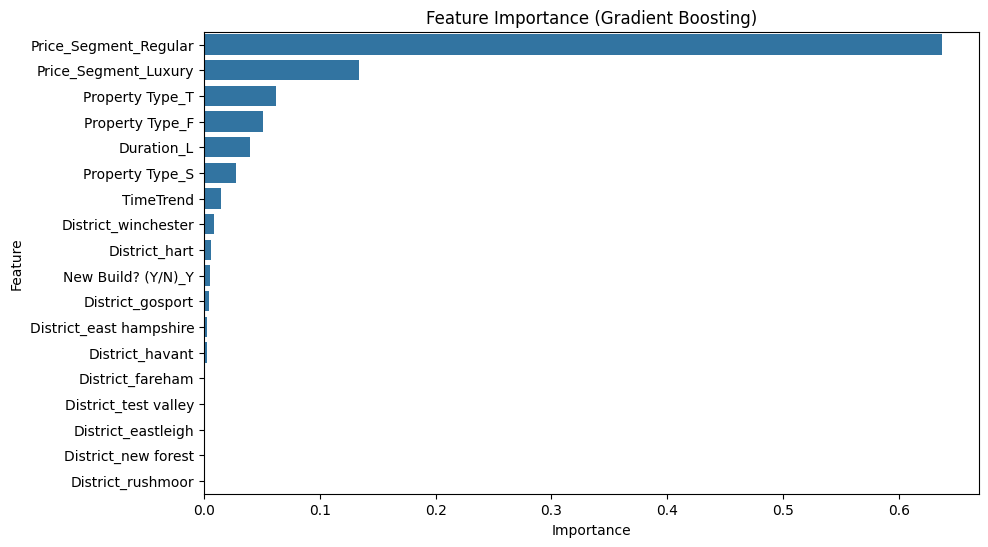

In [ ]:
# Determining Feature importance of Gradient Boosting

# Get feature importances from the best Gradient Boosting model
feature_importances = best_gb_model.feature_importances_

# Create a DataFrame to visualize feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance (Gradient Boosting)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [ ]:
# Converting the date 26/09/2024 into TimeTrend

from datetime import datetime

def convert_to_timetrend(date_string):
  """
  Converts a date string in the format 'DD/MM/YYYY' to a time trend value
  assuming the start date is 01/01/2019.
  """
  try:
    date_object = datetime.strptime(date_string, '%d/%m/%Y')
    start_date = datetime.strptime('01/01/2019', '%d/%m/%Y')
    time_trend = (date_object - start_date).days
    return time_trend
  except ValueError:
    return None


date_string = '01/03/2023'  # Example date string
time_trend = convert_to_timetrend(date_string)
if time_trend is not None:
  print(f'The TimeTrend for {date_string} is: {time_trend}')
else:
  print('Invalid date format.')


The TimeTrend for 01/03/2023 is: 1520


In [ ]:
input_data = {
    'TimeTrend' : 1520,
    'Property Type_F' : 0,
    'Property Type_S' : 0,
    'Property Type_T' : 1,
    'New Build? (Y/N)_Y' : 0,
    'Duration_L' : 0,
    'Price_Segment_Luxury' : 0,
    'Price_Segment_Regular' : 1,
    'District_east hampshire' : 0,
    'District_eastleigh' : 1,
    'District_fareham' : 0,
    'District_gosport' : 0,
    'District_hart' : 0,
    'District_havant' : 0,
    'District_new forest' : 0,
    'District_rushmoor' : 0,
    'District_test valley' : 0,
    'District_winchester' : 0
}

# Creating a DataFrame from the input data
input_df = pd.DataFrame([input_data])

# Use the best Gradient Boosting model to predict the price
predicted_price = best_gb_model.predict(input_df)

print(f'Predicted Price: {predicted_price[0]}')

Predicted Price: 300957.4338876723
